In [1]:
import pandas_datareader as data
BIST30 = data.DataReader('XU030.IS', data_source = 'yahoo' , start='2012-05-01',end='2022-05-01' )
BIST30

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-02,72232.101562,70300.398438,71848.000000,70452.601562,356400.0,70452.601562
2012-05-03,71220.500000,70648.703125,70688.898438,70826.703125,272100.0,70826.703125
2012-05-04,71232.500000,70280.398438,71052.796875,70555.601562,275900.0,70555.601562
2012-05-07,70322.398438,69377.000000,69602.398438,70265.101562,231600.0,70265.101562
2012-05-08,70892.500000,69947.703125,70429.398438,70169.898438,328600.0,70169.898438
...,...,...,...,...,...,...
2022-04-25,2800.600098,2717.899902,2764.600098,2781.899902,2423100.0,2781.899902
2022-04-26,2813.000000,2686.800049,2798.699951,2704.199951,2556900.0,2704.199951
2022-04-27,2748.800049,2684.600098,2709.899902,2745.199951,2228400.0,2745.199951


In [2]:
BIST30['Close']

Date
2012-05-02    70452.601562
2012-05-03    70826.703125
2012-05-04    70555.601562
2012-05-07    70265.101562
2012-05-08    70169.898438
                  ...     
2022-04-25     2781.899902
2022-04-26     2704.199951
2022-04-27     2745.199951
2022-04-28     2706.800049
2022-04-29     2704.399902
Name: Close, Length: 2501, dtype: float64

In [3]:
BIST30.shape

(2501, 6)

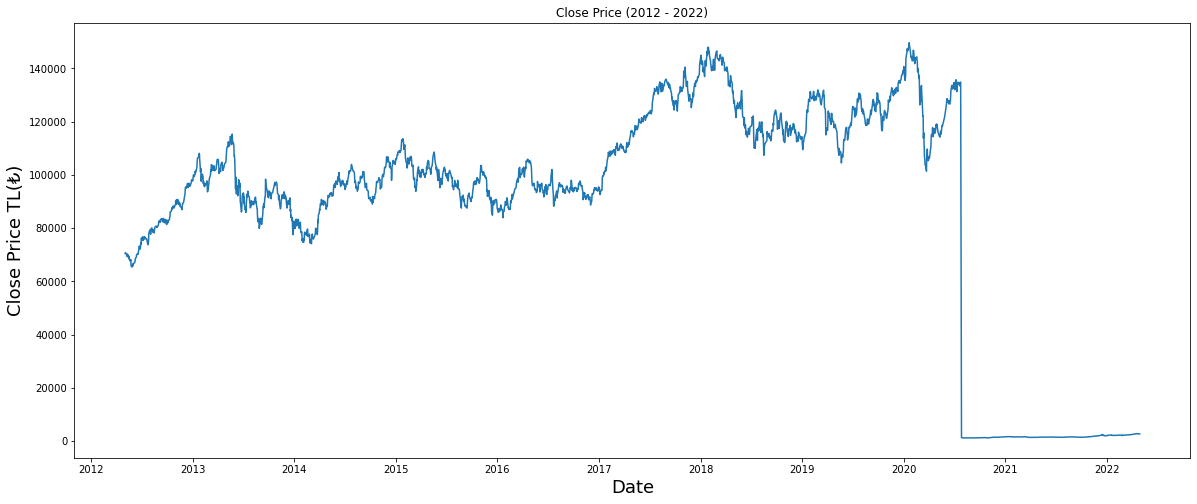

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.title('Close Price (2012 - 2022)')
plt.ylabel('Close Price TL(₺)',fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.plot(BIST30['Close'])
plt.show()


In [5]:
import math


data = BIST30.filter(['Close'])

dataValueSet = data.values


training_len = math.ceil(len(dataValueSet) * .3)
training_len


751

In [6]:
dataValueSet

array([[70452.6015625 ],
       [70826.703125  ],
       [70555.6015625 ],
       ...,
       [ 2745.19995117],
       [ 2706.80004883],
       [ 2704.39990234]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

Rangescaler = MinMaxScaler(feature_range = (0,1))
scaled = Rangescaler.fit_transform(dataValueSet)
scaled 

array([[0.46651929],
       [0.46903836],
       [0.46721286],
       ...,
       [0.01060146],
       [0.01034288],
       [0.01032672]])

In [8]:
train_data = scaled [0:training_len,:]
trainedX = []
trainedY = []
for i in range (100, len(train_data)):
    trainedX.append(train_data[i - 100:i,0])
    trainedY.append(train_data[i,0])

In [9]:
import numpy as np
trainedX , trainedY = np.array(trainedX), np.array(trainedY)

In [10]:
trainedX = np.reshape(trainedX , (trainedX.shape[0],trainedX.shape[1],1))
trainedX.shape

(651, 100, 1)

In [12]:
from keras.layers import Dense , LSTM ,SimpleRNN 
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
neurons = 128
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model  = Sequential()
model.add(LSTM(neurons,return_sequences = True, input_shape = (trainedX.shape[1],1)))
model.add(LSTM(neurons,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 201,395
Trainable params: 201,395
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer ='adam', loss = 'mean_squared_error')

In [14]:
model.fit(trainedX,trainedY,batch_size = 1, epochs =100 , callbacks=[callback])

Epoch 1/100
651/651 [==============================] - 11s 15ms/step - loss: 0.0026
Epoch 2/100
651/651 [==============================] - 10s 15ms/step - loss: 8.9738e-04
Epoch 3/100
651/651 [==============================] - 10s 15ms/step - loss: 5.9921e-04
Epoch 4/100
651/651 [==============================] - 10s 15ms/step - loss: 4.6533e-04
Epoch 5/100
651/651 [==============================] - 10s 15ms/step - loss: 3.8635e-04
Epoch 6/100
651/651 [==============================] - 10s 15ms/step - loss: 4.0745e-04
Epoch 7/100
651/651 [==============================] - 10s 15ms/step - loss: 2.9343e-04
Epoch 8/100
651/651 [==============================] - 10s 15ms/step - loss: 2.5347e-04
Epoch 9/100
651/651 [==============================] - 10s 15ms/step - loss: 3.1313e-04
Epoch 10/100
651/651 [==============================] - 10s 15ms/step - loss: 3.3760e-04
Epoch 11/100
651/651 [==============================] - 10s 15ms/step - loss: 2.7802e-04


In [15]:
data_test = scaled[training_len - 100:,:]
testX = []
for i in range (100,len(data_test)):
    testX.append(data_test[i-100:i,0])
len(data_test)

1850

In [16]:

testX = np.array(testX)

In [17]:
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))


In [18]:
predictions = model.predict(testX)



In [19]:
predictions = Rangescaler.inverse_transform(predictions)


In [20]:
len(predictions)

1750

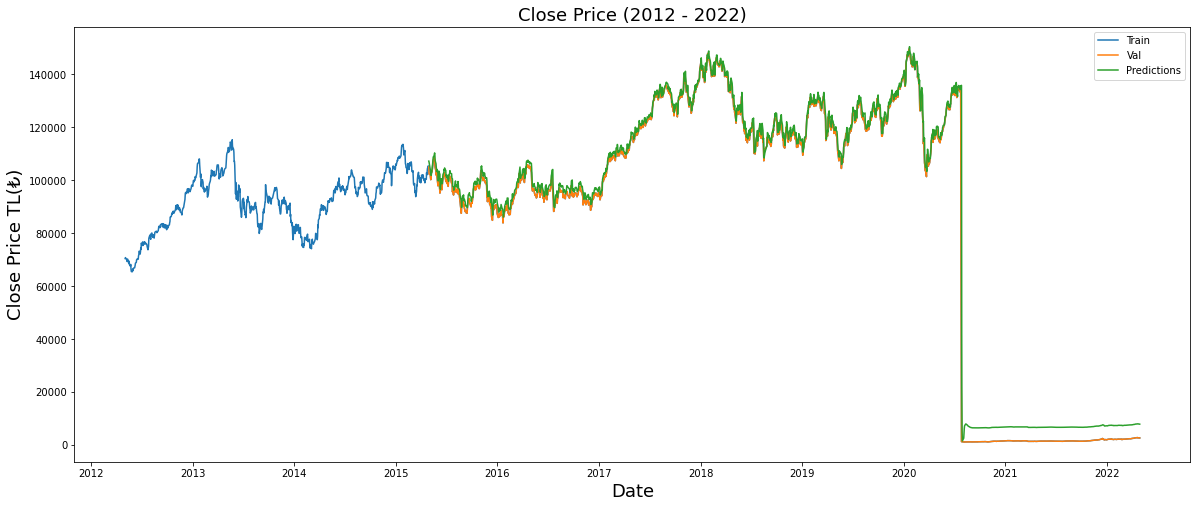

In [22]:
PredVal = data[training_len:]
PredVal.loc[:,'Predictions'] = np.copy(predictions)

plt.figure(figsize = (20,8))
plt.title('Close Price (2012 - 2022)',fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price TL(₺)',fontsize = 18)
plt.plot(BIST30['Close'])
plt.plot(PredVal[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()


In [23]:
PredVal

,Close,Predictions
Date,,
2015-04-29,105052.398438,107266.882812
2015-04-30,102387.000000,106861.820312
2015-05-04,102437.703125,104220.640625
2015-05-05,101498.296875,103786.921875
2015-05-06,100252.703125,103038.601562
...,...,...
2022-04-25,2781.899902,7997.330078
2022-04-26,2704.199951,7981.825195
2022-04-27,2745.199951,7932.331055


In [24]:
PredVal['Close'][100]

93197.1015625

In [25]:
PredVal['Predictions'][100]

94653.51

 Sources : 
 
 1.https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/
 
 2.https://www.tensorflow.org/guide/keras/rnn